In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import h2o

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
org = pd.read_csv(r'C:\Users\hajia\Downloads\cirrhosis+patient+survival+prediction+dataset-1\cirrhosis.csv')

In [273]:
#understand the synthetic train dataset and the orginal dataset
train.nunique()

id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

In [274]:
org.nunique()

ID               418
N_Days           399
Status             3
Drug               2
Age              344
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin         98
Cholesterol      201
Albumin          154
Copper           158
Alk_Phos         295
SGOT             179
Tryglicerides    146
Platelets        243
Prothrombin       48
Stage              4
dtype: int64

In [3]:
vv = org['Status']

In [4]:
org.drop('Status', axis = 1, inplace = True)

In [5]:
org['Status'] = vv

In [6]:
org.rename(columns={'ID': 'id'}, inplace = True)

In [7]:
org.columns == train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [175]:
org

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,1,400,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,D
1,2,4500,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,C
2,3,1012,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,D
3,4,1925,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,D
4,5,1504,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,CL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0,D
414,415,1103,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0,C
415,416,1055,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0,C
416,417,691,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0,C


In [8]:
df = pd.concat([train, org], axis = 0)

In [9]:
df.dropna(inplace = True)

In [10]:
df.sample(frac = 1).reset_index(drop = True)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,5626,1882,D-penicillamine,17090,F,N,Y,Y,N,3.0,361.0,3.65,76.0,1134.0,89.90,90.0,375.0,11.0,4.0,D
1,7156,2332,D-penicillamine,18102,F,N,Y,N,N,0.9,263.0,3.63,19.0,1881.0,97.65,86.0,335.0,10.0,2.0,C
2,251,1457,D-penicillamine,20810,F,N,N,N,N,0.5,227.0,3.61,40.0,676.0,83.00,120.0,249.0,9.9,2.0,C
3,1678,597,D-penicillamine,22514,F,N,Y,Y,N,4.5,262.0,3.30,14.0,1215.0,158.10,84.0,122.0,11.1,4.0,D
4,1644,2556,D-penicillamine,19470,F,N,Y,N,N,1.4,248.0,3.34,63.0,554.0,75.95,106.0,334.0,10.9,4.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8176,1665,2468,Placebo,19025,F,N,N,N,N,1.1,276.0,3.57,54.0,4332.0,99.20,143.0,248.0,11.0,3.0,CL
8177,7869,1827,Placebo,13486,F,N,N,N,N,0.7,288.0,3.51,44.0,1376.0,184.45,85.0,445.0,10.2,2.0,C
8178,2098,597,Placebo,19049,F,N,Y,N,N,3.6,562.0,3.53,172.0,1790.0,328.60,89.0,224.0,11.5,4.0,D
8179,4773,2168,Placebo,20834,F,N,N,N,N,0.5,239.0,3.48,38.0,884.0,79.05,224.0,214.0,9.8,3.0,C


In [11]:
# Feature engineering
def age(x):
    vv = x['Age']
    agee = []
    for i in vv:
        agee.append(i/365.25)
    x['Age in years'] = agee

age(df)
age(test)

In [12]:
#lets identify if the patient is suffering from low blood platelet count since it plays major role in liver cirrhosis, low blood platelet count is also called as
#Thrombocytopenia so lets name it as our column and try a new code i learnt
# blood platelet count below 150,000 is considered as thrombocytopenia 
df['Thrombocytopenia'] = np.where(df['Platelets']<150,1,0)
test['Thrombocytopenia'] = np.where(test['Platelets']<150, 1, 0)

In [13]:
#Bilirubin levels are one of the important markers in the liver function, elevated level of bilirubin can suggest the liver dysfunction leading to jaundice like conditions
# so lets create a column which classifies the patients based on their bilirubin levels if they are having liver dysfunction
# normal bilirlubin levels are between 0.2-1.3 mg/dL so lets classify them 
df['el_bil'] = np.where((df['Bilirubin']>0.2) & (df['Bilirubin']<1.3), 0,1)
test['el_bil'] = np.where((test['Bilirubin']>0.2) & (test['Bilirubin']<1.3), 0,1)

In [14]:
#low level of albumin are the indicators of deteriorating liver function  so lets classify based on the level of albumin in the blood
df['Albumin']
ll_alb = 3.5
ul_alb = 5.4
df['lo_alb'] = np.where((df['Albumin']<3.5), 1, 0)
test['lo_alb'] = np.where((test['Albumin']<3.5), 1, 0)

In [15]:
#if the copper levels are above 140 micrograms then it is indicative of deteriorating liver function
df['el_co'] = np.where(df['Copper']>140, 1,0)
test['el_co'] = np.where(test['Copper']>140, 1,0)

In [16]:
#if the alkaline phosphatase level are above 147 it is indicative of declining liver function 
df['el_phos'] = np.where(df['Alk_Phos']>147,1,0)
test['el_phos'] = np.where(test['Alk_Phos']>147,1,0)

In [17]:
df['el_sgot'] = np.where(df['SGOT']>45,1,0)
test['el_sgot'] = np.where(test['SGOT']>45,1,0)

In [18]:
df['el_clot'] = np.where(df['Prothrombin']>13.5,1,0)
test['el_clot'] = np.where(test['Prothrombin']>13.5,1,0)

In [19]:
#as the age progresses the risk of liver disease severity increases so it is good to classify the patients based on their ages 
df['Age_class'] = pd.cut(df['Age in years'], bins = [19,29,39,49,59,69,79,89,99], labels = range(0,8,1)).astype('int16')
test['Age_class'] = pd.cut(test['Age in years'], bins = range(19,100,10), labels = range(0,8,1)).astype('int16')

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly  = PolynomialFeatures(interaction_only = True, include_bias = False)
features = df[['Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Age in years', 'Thrombocytopenia', 'el_bil',
       'lo_alb', 'el_co', 'el_phos', 'el_sgot', 'el_clot', 'Age_class']]

In [20]:
#child pugh score is utilised to calculate liver function it would give some patterns of risk in the patients based on their symptoms
import pandas as pd




# Define scoring functions
def bilirubin_score(bilirubin):
    if bilirubin < 2:
        return 1
    elif 2 <= bilirubin <= 3:
        return 2
    else:
        return 3

def albumin_score(albumin):
    if albumin > 3.5:
        return 1
    elif 2.8 <= albumin <= 3.5:
        return 2
    else:
        return 3

def ascites_score(ascites):
    if ascites == 'N':
        return 1
    else:
        return 3

def prothrombin_score(prothrombin):
    if prothrombin < 4:
        return 1
    elif 4 <= prothrombin <= 6:
        return 2
    else:
        return 3

# Apply scoring functions
df['Bilirubin_Score'] = df['Bilirubin'].apply(bilirubin_score)
df['Albumin_Score'] = df['Albumin'].apply(albumin_score)
df['Ascites_Score'] = df['Ascites'].apply(ascites_score)
df['Prothrombin_Score'] = df['Prothrombin'].apply(prothrombin_score)

# Calculate Child-Pugh score
df['Child_Pugh_Score'] = df[['Bilirubin_Score', 'Albumin_Score', 'Ascites_Score', 'Prothrombin_Score']].sum(axis=1)

# Display the results
print(df[['id', 'Child_Pugh_Score']])

test['Bilirubin_Score'] = test['Bilirubin'].apply(bilirubin_score)
test['Albumin_Score'] = test['Albumin'].apply(albumin_score)
test['Ascites_Score'] = test['Ascites'].apply(ascites_score)
test['Prothrombin_Score'] = test['Prothrombin'].apply(prothrombin_score)

# Calculate Child-Pugh score
test['Child_Pugh_Score'] = test[['Bilirubin_Score', 'Albumin_Score', 'Ascites_Score', 'Prothrombin_Score']].sum(axis=1)

# Display the results
print(df[['id', 'Child_Pugh_Score']])


      id  Child_Pugh_Score
0      0                 8
1      1                 6
2      2                 8
3      3                 7
4      4                 6
..   ...               ...
307  308                 6
308  309                 8
309  310                 7
310  311                 8
311  312                 8

[8181 rows x 2 columns]
      id  Child_Pugh_Score
0      0                 8
1      1                 6
2      2                 8
3      3                 7
4      4                 6
..   ...               ...
307  308                 6
308  309                 8
309  310                 7
310  311                 8
311  312                 8

[8181 rows x 2 columns]


In [21]:
df = df.sample(frac = 1).reset_index( drop= True)

In [22]:
df

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,el_co,el_phos,el_sgot,el_clot,Age_class,Bilirubin_Score,Albumin_Score,Ascites_Score,Prothrombin_Score,Child_Pugh_Score
0,7620,1882,D-penicillamine,20392,F,N,Y,N,N,0.6,...,0,1,1,0,3,1,1,1,3,6
1,3236,3445,Placebo,19025,F,N,Y,N,N,0.6,...,1,1,1,0,3,1,1,1,3,6
2,3653,3672,D-penicillamine,22857,F,N,N,N,N,0.6,...,0,1,1,0,4,1,1,1,3,6
3,4900,4556,D-penicillamine,19155,F,N,N,N,N,1.1,...,0,1,1,0,3,1,1,1,3,6
4,1457,4127,D-penicillamine,17080,F,N,Y,N,S,1.9,...,0,1,1,0,2,1,2,1,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8176,6080,3090,D-penicillamine,11912,F,N,Y,N,N,1.2,...,0,1,1,0,1,1,2,1,3,7
8177,6612,2363,Placebo,11773,F,N,N,Y,N,4.7,...,0,1,1,0,1,3,1,1,3,8
8178,716,2503,Placebo,23331,F,N,N,N,N,0.7,...,0,1,1,0,4,1,1,1,3,6
8179,121,191,Placebo,24803,M,Y,Y,N,Y,1.3,...,0,1,1,0,4,1,2,3,3,9


In [25]:
feat = df.drop('Status', axis = 1).select_dtypes(exclude= [np.number])
feat.columns
tfeat = test.select_dtypes(exclude = [np.number])
tfeat.columns
feat.columns

Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')

In [26]:
df.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status', 'Age in years', 'Thrombocytopenia', 'el_bil',
       'lo_alb', 'el_co', 'el_phos', 'el_sgot', 'el_clot', 'Age_class',
       'Bilirubin_Score', 'Albumin_Score', 'Ascites_Score',
       'Prothrombin_Score', 'Child_Pugh_Score'],
      dtype='object')

In [27]:
fea_enc = pd.get_dummies(feat, drop_first=True, dtype = 'int')
tea_enc = pd.get_dummies(tfeat, drop_first=True, dtype = 'int')

In [28]:
fea_enc

,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
0,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...
8176,0,0,0,1,0,0,0
8177,1,0,0,0,1,0,0
8178,1,0,0,0,0,0,0
8179,1,1,1,1,0,0,1


In [160]:
df.drop(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status'], axis = 1, inplace = True)
test.drop(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], axis = 1, inplace = True)


In [29]:
df.drop('id', axis = 1, inplace = True)
test.drop('id', axis = 1, inplace = True)

In [161]:
df[['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Age in years']]

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age in years
0,2456,15116,0.9,316.0,3.46,52.0,1866.0,97.65,87.0,289.0,9.6,3.0,41.385352
1,2216,19221,0.7,201.0,4.01,28.0,1212.0,72.85,58.0,309.0,9.5,3.0,52.624230
2,2363,20834,3.2,226.0,3.34,13.0,810.0,72.24,62.0,143.0,12.4,4.0,57.040383
3,4795,12433,0.8,324.0,3.87,29.0,843.0,62.00,86.0,225.0,10.7,2.0,34.039699
4,2216,19295,12.7,1236.0,3.57,36.0,5487.2,51.15,99.0,200.0,11.0,4.0,52.826831
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8176,1682,17512,0.9,376.0,3.02,200.0,1015.0,83.70,154.0,238.0,10.3,3.0,47.945243
8177,799,14899,0.6,299.0,3.36,23.0,2769.0,220.10,85.0,399.0,10.8,2.0,40.791239
8178,1945,14106,1.0,309.0,3.66,77.0,1214.0,158.10,101.0,309.0,9.7,3.0,38.620123
8179,2574,20535,0.6,280.0,3.20,25.0,1024.0,77.50,146.0,361.0,10.2,2.0,56.221766


C:\Users\hajia\AppData\Local\Temp\ipykernel_27732\564010466.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Child_Pugh_Score'])


<Axes: xlabel='Child_Pugh_Score', ylabel='Density'>

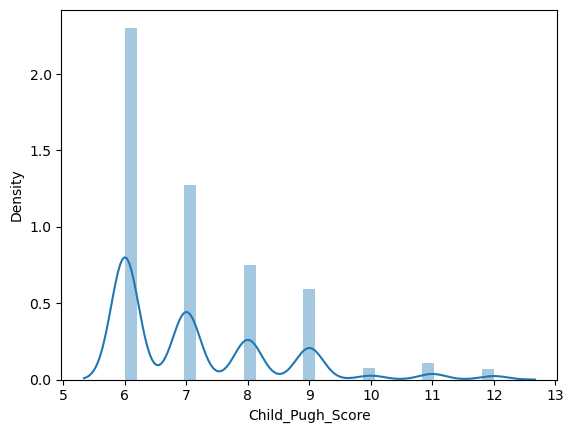

In [90]:
sns.distplot(df['Child_Pugh_Score'])

In [30]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
tryy = pd.DataFrame(ss.fit_transform(df[['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']]), columns = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'])


In [31]:
tess = pd.DataFrame(ss.fit_transform(test[['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']]), columns = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'])

In [32]:
tryy

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,-0.133777,0.549499,-0.525353,-0.509338,0.811759,-0.843882,-0.593741,-1.172561,-0.898819,-0.617344,-1.053755
1,1.293942,0.178563,-0.525353,-0.331533,0.811759,1.145670,2.249256,-0.869318,-0.729108,0.204073,0.464187
2,1.501294,1.218377,-0.525353,-0.692224,0.438524,-0.752258,-0.595311,-1.172561,-0.578252,-0.708613,-0.927260
3,2.308782,0.213839,-0.395278,0.318728,2.448252,0.478123,4.825941,-0.711688,-1.143959,2.075077,0.464187
4,1.916913,-0.349213,-0.187158,-0.016563,-0.135684,-0.163246,0.019456,2.110373,-0.144544,-0.195227,-0.041794
...,...,...,...,...,...,...,...,...,...,...,...
8176,0.969668,-1.751550,-0.369263,-0.367094,-0.135684,-0.595188,-0.574906,-0.793761,-0.182258,0.466470,0.590682
8177,0.305592,-1.789268,0.541262,-0.585541,0.007868,0.360321,-0.225927,0.468906,-0.031403,0.763092,-0.927260
8178,0.433474,1.346997,-0.499338,-0.692224,0.524655,-0.739169,2.098154,-1.235695,-0.823392,-0.765655,-0.674270
8179,-1.678416,1.746424,-0.343248,-1.017355,-1.341521,-0.150157,-0.371902,-1.393528,-1.257100,-0.594527,3.247080


In [33]:
df_f = pd.concat([tryy,fea_enc], axis = 1)

tes_f = pd.concat([tess,tea_enc], axis = 1)


In [34]:
df_f

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
0,-0.133777,0.549499,-0.525353,-0.509338,0.811759,-0.843882,-0.593741,-1.172561,-0.898819,-0.617344,-1.053755,0,0,0,1,0,0,0
1,1.293942,0.178563,-0.525353,-0.331533,0.811759,1.145670,2.249256,-0.869318,-0.729108,0.204073,0.464187,1,0,0,1,0,0,0
2,1.501294,1.218377,-0.525353,-0.692224,0.438524,-0.752258,-0.595311,-1.172561,-0.578252,-0.708613,-0.927260,0,0,0,0,0,0,0
3,2.308782,0.213839,-0.395278,0.318728,2.448252,0.478123,4.825941,-0.711688,-1.143959,2.075077,0.464187,0,0,0,0,0,0,0
4,1.916913,-0.349213,-0.187158,-0.016563,-0.135684,-0.163246,0.019456,2.110373,-0.144544,-0.195227,-0.041794,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8176,0.969668,-1.751550,-0.369263,-0.367094,-0.135684,-0.595188,-0.574906,-0.793761,-0.182258,0.466470,0.590682,0,0,0,1,0,0,0
8177,0.305592,-1.789268,0.541262,-0.585541,0.007868,0.360321,-0.225927,0.468906,-0.031403,0.763092,-0.927260,1,0,0,0,1,0,0
8178,0.433474,1.346997,-0.499338,-0.692224,0.524655,-0.739169,2.098154,-1.235695,-0.823392,-0.765655,-0.674270,1,0,0,0,0,0,0
8179,-1.678416,1.746424,-0.343248,-1.017355,-1.341521,-0.150157,-0.371902,-1.393528,-1.257100,-0.594527,3.247080,1,1,1,1,0,0,1


In [267]:
y_test =  tes_f

In [300]:
df_f.drop(['Status_CL', 'Status_D'],axis =1,inplace = True)

KeyError: "['Status_CL', 'Status_D'] not found in axis"

In [212]:
y = df['Status']
x = df_f

In [224]:
from sklearn.metrics import roc_auc_score, roc_curve


In [230]:
df[['id', 'Status']].groupby('Status').count()

,id
Status,
C,5112
CL,293
D,2776


In [35]:
dfull = pd.concat([df_f,df[['Age in years','Thrombocytopenia', 'el_bil',
       'lo_alb', 'el_co', 'el_phos', 'el_sgot', 'el_clot', 'Age_class',
       'Bilirubin_Score', 'Albumin_Score', 'Ascites_Score',
       'Prothrombin_Score', 'Child_Pugh_Score', 'Stage']]], axis = 1)

In [36]:
tfull = pd.concat([tes_f,test[['Age in years','Thrombocytopenia', 'el_bil',
       'lo_alb', 'el_co', 'el_phos', 'el_sgot', 'el_clot', 'Age_class',
       'Bilirubin_Score', 'Albumin_Score', 'Ascites_Score',
       'Prothrombin_Score', 'Child_Pugh_Score', 'Stage']]], axis = 1)

In [39]:
dfull.columns==tfull.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [42]:
x = dfull
y = df['Status']

xd = dfad.drop('Status', axis = 1)
yd = dfad['Status']
from flaml import AutoML
automl = AutoML()
adml = automl.fit(xd,yd, task = 'classification', metric = 'roc_auc',time_budget = 300)

In [264]:
automl.best_estimator, automl.best_config

('lgbm',
 {'n_estimators': 96,
  'num_leaves': 13,
  'min_child_samples': 6,
  'learning_rate': 0.03975596653027463,
  'log_max_bin': 10,
  'colsample_bytree': 0.6229741816501054,
  'reg_alpha': 0.0009765625,
  'reg_lambda': 0.021711381455942168})

xk = dfak.drop('Status', axis = 1)
yk = dfak['Status']
from flaml import AutoML
automll = AutoML()
akml = automll.fit(xk,yk, task = 'classification', metric = 'roc_auc',time_budget = 300)

In [265]:
automll.best_estimator, automll.best_config

('extra_tree',
 {'n_estimators': 56,
  'max_features': 0.15730861632662943,
  'max_leaves': 10,
  'criterion': 'gini'})

In [270]:
dfull['Stage']

0      -0.037828
1      -0.037828
2       1.116922
3      -0.037828
4       1.116922
          ...   
8176   -1.192579
8177   -1.192579
8178   -1.192579
8179   -1.192579
8180   -1.192579
Name: Stage, Length: 8181, dtype: float64

In [308]:
pip install auto-sklearn

     ---------------------------------------- 0.0/6.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.5 MB 281.8 kB/s eta 0:00:23
      --------------------------------------- 0.1/6.5 MB 778.5 kB/s eta 0:00:09
     -- ------------------------------------- 0.5/6.5 MB 2.0 MB/s eta 0:00:03
     ------ --------------------------------- 1.0/6.5 MB 4.0 MB/s eta 0:00:02
     --------- ------------------------------ 1.5/6.5 MB 4.8 MB/s eta 0:00:02
     --------------- ------------------------ 2.5/6.5 MB 7.3 MB/s eta 0:00:01
     ---------------------- ----------------- 3.6/6.5 MB 8.9 MB/s eta 0:00:01
     --------------------------- ------------ 4.4/6.5 MB 9.7 MB/s eta 0:00:01
     -------------------------------- ------- 5.2/6.5 MB 10.8 MB/s eta 0:00:01
     -------------------------------- ------- 5.2/6.5 MB 10.8 MB/s eta 0:00:01
 

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      Traceback (most recent call last):
        File "d:\Anaconda\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "d:\Anaconda\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "d:\Anaconda\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
                 ^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\hajia\AppData\Local\Temp\pip-build-env-v0d9nlc1\overlay\Lib\site-packages\setuptools\build_meta.py", line 327, in get_requires_for_build_wheel
          return self._get_build_r

In [312]:
import autosklearn
print('auto-sklearn version:', autosklearn.__version__)

ModuleNotFoundError: No module named 'autosklearn'

In [100]:
import os
os.environ['sys.ai.h2o.automl.xgboost.multinode.enabled'] = 'true'

In [101]:
import h2o
from h2o.automl import H2OAutoML

In [102]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 19 mins
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.4
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,hajia
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.371 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [45]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size = 0.7, random_state = 100)

In [103]:
aml = H2OAutoML(max_runtime_secs=7200, max_models = 20, stopping_metric='logloss', seed = 1)

In [64]:
#dfull = pd.concat([dfull,df['Status']], axis = 1)
dfull

,Unnamed: 0,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,el_sgot,el_clot,Age_class,Bilirubin_Score,Albumin_Score,Ascites_Score,Prothrombin_Score,Child_Pugh_Score,Stage,Status
0,0,-0.133777,0.549499,-0.525353,-0.509338,0.811759,-0.843882,-0.593741,-1.172561,-0.898819,...,1,0,3,1,1,1,3,6,3.0,C
1,1,1.293942,0.178563,-0.525353,-0.331533,0.811759,1.145670,2.249256,-0.869318,-0.729108,...,1,0,3,1,1,1,3,6,4.0,C
2,2,1.501294,1.218377,-0.525353,-0.692224,0.438524,-0.752258,-0.595311,-1.172561,-0.578252,...,1,0,4,1,1,1,3,6,3.0,C
3,3,2.308782,0.213839,-0.395278,0.318728,2.448252,0.478123,4.825941,-0.711688,-1.143959,...,1,0,3,1,1,1,3,6,3.0,D
4,4,1.916913,-0.349213,-0.187158,-0.016563,-0.135684,-0.163246,0.019456,2.110373,-0.144544,...,1,0,2,1,2,1,3,7,4.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8176,8176,0.969668,-1.751550,-0.369263,-0.367094,-0.135684,-0.595188,-0.574906,-0.793761,-0.182258,...,1,0,1,1,2,1,3,7,3.0,D
8177,8177,0.305592,-1.789268,0.541262,-0.585541,0.007868,0.360321,-0.225927,0.468906,-0.031403,...,1,0,1,3,1,1,3,8,4.0,C
8178,8178,0.433474,1.346997,-0.499338,-0.692224,0.524655,-0.739169,2.098154,-1.235695,-0.823392,...,1,0,4,1,1,1,3,6,1.0,C
8179,8179,-1.678416,1.746424,-0.343248,-1.017355,-1.341521,-0.150157,-0.371902,-1.393528,-1.257100,...,1,0,4,1,2,3,3,9,4.0,D


In [54]:
dfull.to_csv('eda_cirrhosis.csv')

In [104]:
data = h2o.import_file('eda_cirrhosis.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [82]:
response = 'Status'
predictors = data.columns
predictors.remove(response)


In [83]:
data['Status'] = data['Status'].asfactor()

In [84]:
train,test = data.split_frame(ratios=[0.7], seed=1234)

In [89]:
import xgboost

In [106]:
aml.train(x = predictors, y = response, training_frame=train)

AutoML progress: |


18:24:16.734: AutoML: XGBoost is not available; skipping it.
18:24:16.742: _train param, Dropping bad and constant columns: [Prothrombin_Score, el_phos]
18:24:23.968: Empty leaderboard.
AutoML was not able to build any model within a max runtime constraint of 7200 seconds, you may want to increase this value before retrying.
18:28:29.379: New models will be added to existing leaderboard AutoML_5_20240815_182416@@Status (leaderboard frame=null) with already 0 models.
18:28:29.379: AutoML: XGBoost is not available; skipping it.
18:28:29.384: _train param, Dropping bad and constant columns: [Prothrombin_Score, el_phos]

████
18:28:37.351: _train param, Dropping bad and constant columns: [Prothrombin_Score, el_phos]
18:28:44.47: _train param, Dropping bad and constant columns: [Prothrombin_Score, el_phos]

██
18:28:52.688: _train param, Dropping bad and constant columns: [Prothrombin_Score, el_phos]

█
18:28:57.248: _train param, Dropping bad and constant columns: [Prothrombin_Score, el_p

key,value
Stacking strategy,cross_validation
Number of base models (used / total),18/20
# GBM base models (used / total),9/10
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),7/7
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [91]:
leaderboard = aml.leaderboard
leaderboard

model_id,mean_per_class_error,logloss,rmse,mse
GBM_3_AutoML_3_20240815_175809,0.391836,0.453666,0.368777,0.135996
GBM_4_AutoML_3_20240815_175809,0.395288,0.451249,0.368107,0.135502
GBM_grid_1_AutoML_3_20240815_175809_model_5,0.396244,0.467064,0.373383,0.139415
GBM_5_AutoML_3_20240815_175809,0.396251,0.45887,0.370101,0.136974
GBM_6_AutoML_3_20240815_175809,0.40046,0.451645,0.369556,0.136572
GBM_2_AutoML_3_20240815_175809,0.401387,0.445266,0.368485,0.135781
GBM_grid_1_AutoML_3_20240815_175809_model_4,0.403961,0.446623,0.368311,0.135653
GBM_grid_1_AutoML_3_20240815_175809_model_1,0.404949,0.459376,0.371418,0.137952
GBM_grid_1_AutoML_3_20240815_175809_model_2,0.407389,0.44861,0.369709,0.136685
GBM_grid_1_AutoML_3_20240815_175809_model_3,0.408738,0.451334,0.370785,0.137481


In [96]:
best_model = aml.leader
print(best_model)



Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_3_AutoML_3_20240815_175809


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    53                 159                         135954                 7            7            7             24            90            63.3774

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.05398223584435278
RMSE: 0.23234077525125196
LogLoss: 0.2006246471108766
Mean Per-Class Error: 0.14936679832403046
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model par

In [108]:
pre_test = aml.predict(test)

stackedensemble prediction progress: |

███████████████████████████████████████████| (done) 100%


In [111]:
bam = aml.leader

In [113]:
bam.model_performance(test)

ModelMetricsMultinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.13791028381195733
RMSE: 0.3713627388577876
LogLoss: 0.45010910193391673
Null degrees of freedom: 2455
Residual degrees of freedom: 2407
Null deviance: 3802.0181849579385
Residual deviance: 2210.935908699399
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
C     CL    D    Error      Rate
----  ----  ---  ---------  -----------
1435  2     118  0.0771704  120 / 1,555
41    18    28   0.793103   69 / 87
220   7     587  0.27887    227 / 814
1696  27    733  0.169381   416 / 2,456

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.830619
2    0.973534
3    1

In [118]:
tfull.to_csv('test_full.csv')

In [119]:
tf = h2o.import_file('test_full.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [134]:
x = aml.predict(tf)[0]

stackedensemble prediction progress: |

███████████████████████████████████████████| (done) 100%


In [143]:
test_pre = []
for i in x:
    print(len(i))

5271


In [147]:
prets = aml.predict(tf)

stackedensemble prediction progress: |

███████████████████████████████████████████| (done) 100%


d:\Anaconda\Lib\site-packages\h2o\job.py:81: UserWarning: Test/Validation dataset is missing column 'Unnamed: 0': substituting in a column of NaN
  warnings.warn(w)


In [149]:
pre_df = prets.as_data_frame()

d:\Anaconda\Lib\site-packages\h2o\frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [155]:
pre_df['predict']

0       C
1       C
2       D
3       C
4       C
       ..
5266    C
5267    C
5268    C
5269    C
5270    D
Name: predict, Length: 5271, dtype: object

In [152]:
tis = pd.read_csv('test.csv')

In [156]:
tis['Status'] = pre_df['predict']